In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('../input/prehackathonsup/train_data/train_data.csv')
null_rate = (dataset.isnull().sum()/dataset.shape[0]) * 100

empty_col = []
for i, x in enumerate(null_rate.index):
    if null_rate[i] > 99.5:
        empty_col.append(x)

# データが99.5%存在しないカラムについては削除
dataset = dataset.drop(columns=empty_col)

# engine_no毎にカラムを見て、定数しかない場合は学習に含めない
cons_col = []
for engine in dataset.groupby(['engine_no']):
    for col in engine[1]:
        if len(engine[1].loc[:,col].drop_duplicates()) <= 1:
            cons_col.append(col)


ValueError: dictionary update sequence element #0 has length 9; 2 is required

In [64]:
list_engine_no = list(dataset['engine_no'].drop_duplicates())

ratio = .3
engine_no_test = list_engine_no[:int(len(list_engine_no) * ratio)]
engine_no_train = [x for x in list_engine_no if x not in engine_no_test]

nan_column = dataset.columns[dataset.isna().any()].tolist()
const_columns = [c for c in dataset.columns if len(dataset[c].drop_duplicates()) <= 2]
print('Columns with all nan: \n' + str(nan_column) + '\n')
print('Columns with all const values: \n' + str(const_columns) + '\n')

Columns with all nan: 
[]

Columns with all const values: 
['op_setting_3', 'sensor_16', 'sensor_19']



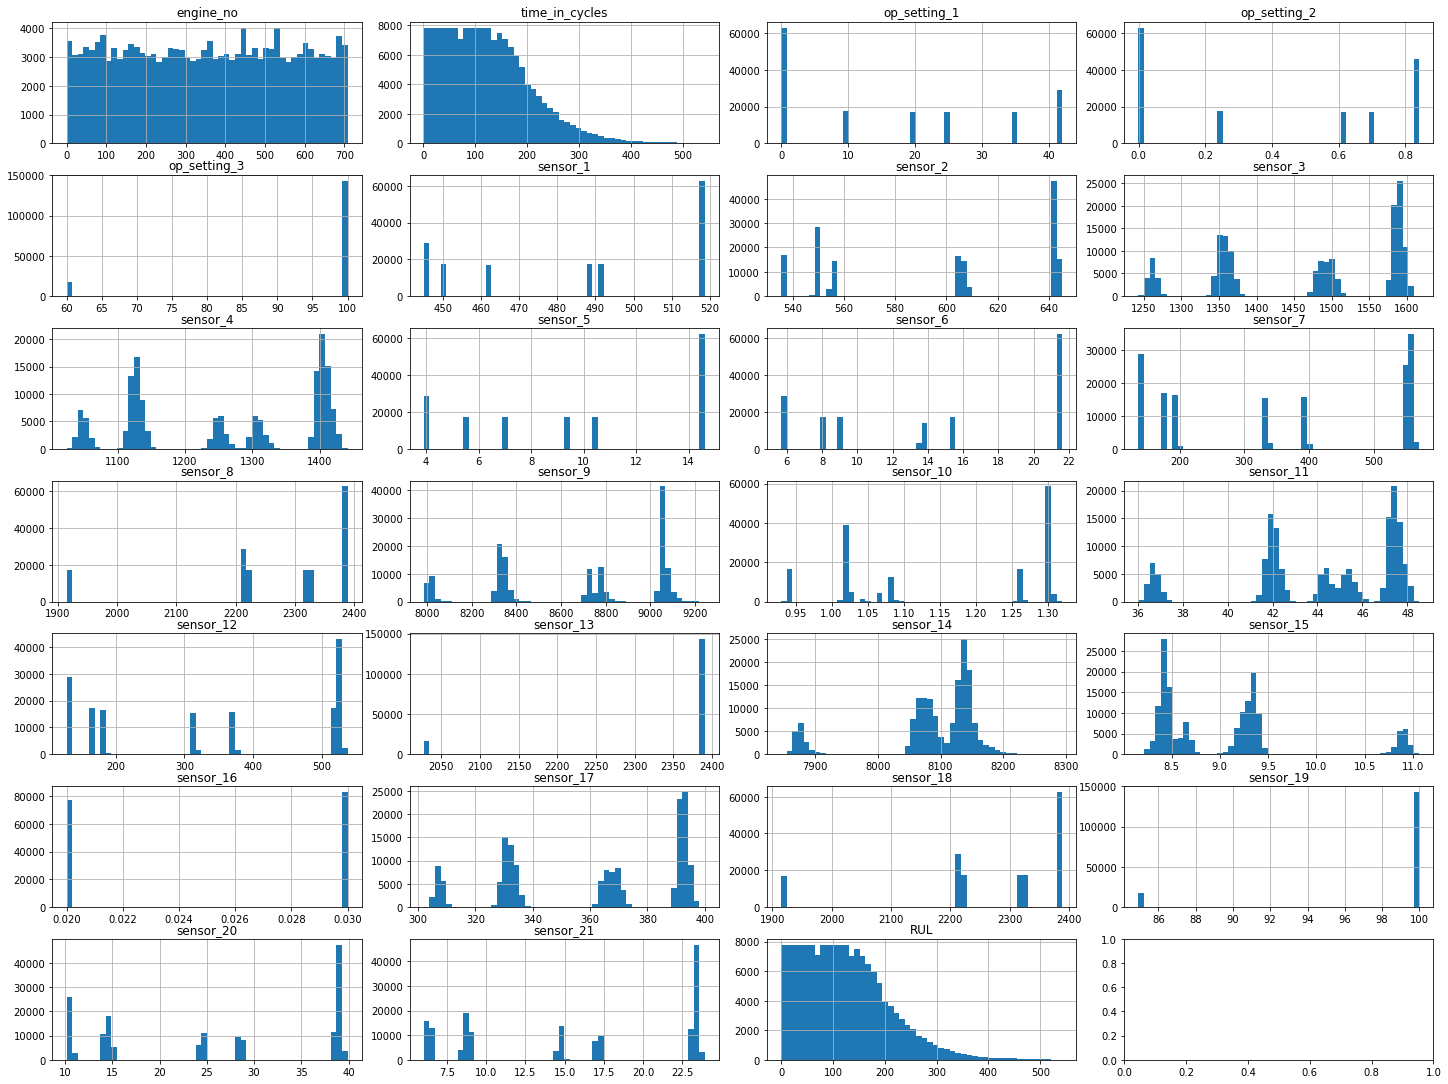

In [48]:
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20,15))
plt.tight_layout()
for i, x in enumerate(dataset):
    row = int(i//4)
    col = int(i%4)
    dataset[x].hist(bins=50, ax=ax[row, col])
    ax[row, col].set_title(x)

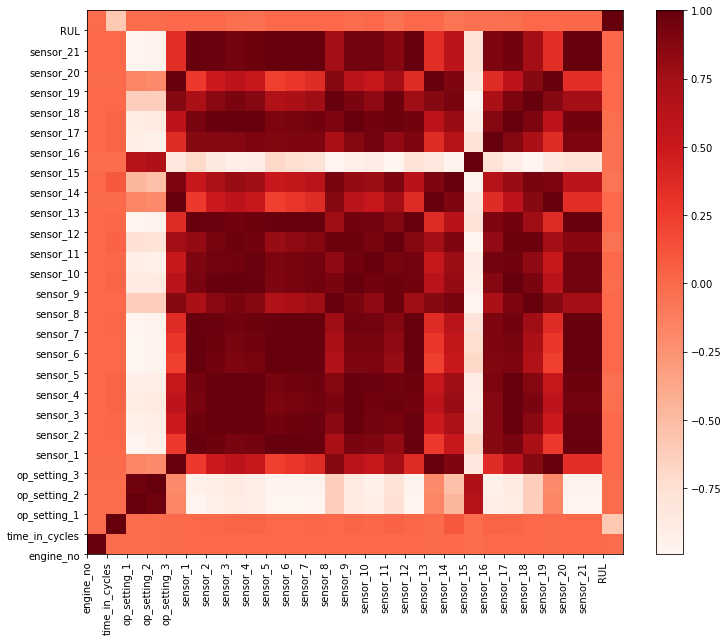

In [52]:
corr = dataset.corr()
fig, ax = plt.subplots(figsize=(12,10))
heatmap = ax.pcolor(corr, cmap=plt.cm.Reds, vmax=1.0)
ax.set_xticks(np.arange(corr.shape[0]))
ax.set_yticks(np.arange(corr.shape[1]))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
fig.colorbar(heatmap, ax=ax)